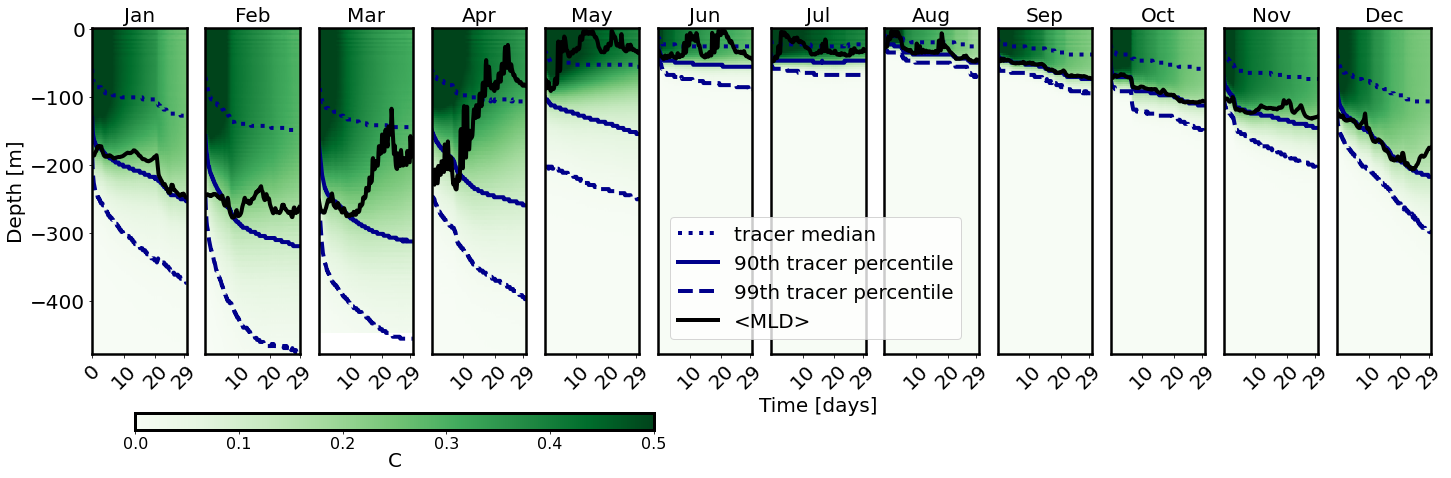

In [1]:

"""
TP 21/08/2023 
Plot tracer distribution on z with time evolution
Plot the MLD rho as well
Plot the tracer 90th percentile evolution
"""

######################
#import useful modules
######################


import matplotlib
matplotlib.use('Agg')
import sys 
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')
from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import scipy.stats as stats 
import netCDF4 as nc4
import warnings 
warnings. filterwarnings('ignore')

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

%matplotlib inline 

nb_dpi=50
dir_save = "/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/"
dir_data = "/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/time_evolution/"
list_month = ['jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec']
list_month_str = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Grid 
binz = np.arange(-600,6,3)
bin_width = 3
bin_centers = binz[1:] - bin_width/2

#index_max = 66 # around 400m depth
index_max = 40 # around 400m depth

fig = plt.figure(figsize=(24,6))

for i in range(0,len(list_month)):
    
    month=list_month[i]
    nc = nc4.Dataset(dir_data+'tracer_percentile_{0}.nc'.format(month),'r') # CHANGE
    tpas = np.asfortranarray(nc.variables['tpas'])
    mld_d_median = -np.asfortranarray(nc.variables['mld_d_median'])
    mld_d_10p = -np.asfortranarray(nc.variables['mld_d_10p'])
    mld_d_90p = -np.asfortranarray(nc.variables['mld_d_90p'])
    tracer_99p = np.asfortranarray(nc.variables['tracer_99p'])
    tracer_50p = np.asfortranarray(nc.variables['tracer_50p'])
    tracer_90p = np.asfortranarray(nc.variables['tracer_90p'])
    #tracer_95p = np.asfortranarray(nc.variables['tracer_95p'])
    time = np.arange(0,mld_d_median.shape[0])
    
    fig.add_subplot(1,12,i+1)
    
    plt.plot(time ,tracer_50p,color ='darkblue',label='tracer median',linestyle=':',linewidth=4)
    plt.plot(time ,tracer_90p,color ='darkblue',label='90th tracer percentile',linestyle='solid',linewidth=4)
    plt.plot(time ,tracer_99p,color ='darkblue',label='99th tracer percentile',linestyle='--',linewidth=4)
    plt.plot(time,mld_d_median,color='k',linestyle='solid',linewidth=4,label='<MLD>')
    cf = plt.pcolormesh(time,bin_centers[index_max:],tpas[:,index_max:].T,vmin=0,vmax=0.5,cmap=plt.cm.Greens)
    plt.title(list_month_str[i],size=20)
    plt.xticks([10*8,20*8,29*8],[10,20,29],size=20,rotation=45)
    
    if i == 6:
        plt.xlabel('Time [days]', size=20)
    
    
    if i == 0:
        plt.yticks(size=20,rotation=0)
        plt.ylabel('Depth [m]', size=20)
        plt.xticks([0,10*8,20*8,29*8],[0,10,20,29],size=20,rotation=45)

    else :
        plt.yticks([],[])
        
    if i ==7:
        plt.legend(prop={'size': 20},bbox_to_anchor=(0.92, 0.45))
    
    cbaxes = fig.add_axes([0.15, -0.05, 0.3, 0.04]) 
    cbar = plt.colorbar(cf, cax = cbaxes,orientation="horizontal")  
    cbar.set_label('C', rotation=0,labelpad=0, y=0,size=20)
    cbar.ax.tick_params(labelsize=16)
    
    #plt.grid()
    
plt.savefig(dir_save+'tracer_evolution_month.pdf', dpi = nb_dpi,bbox_inches='tight')

# Tracer deepening vs front area 

In [7]:
H_f_c_list=[]
H_f_ac_list=[]
H_f_tot_list =[]
tracer_deep_90 = []
tracer_deep_99 = []
tracer_deep_50 = []
tracer_subduction = []
mld_mean = []

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

for i in range(0,len(list_month)):
        
    month=list_month[i]
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    
    nc = nc4.Dataset(dir_data+'tracer_percentile_{0}.nc'.format(month),'r') # CHANGE
    Q_tracer = np.asfortranarray(nc.variables['Q'])
    tracer_99p = np.asfortranarray(nc.variables['tracer_99p'])
    tracer_90p = np.asfortranarray(nc.variables['tracer_90p'])
    tracer_50p = np.asfortranarray(nc.variables['tracer_50p'])
    mld_d_median = -np.asfortranarray(nc.variables['mld_d_median'])
    argmld = np.argmin(np.abs(bin_centers-mld_d_median[0]))

    tracer_deep_90.append(tracer_90p[0] - tracer_90p[-1])
    tracer_deep_99.append(tracer_99p[0] - tracer_99p[-1])
    tracer_deep_50.append(tracer_50p[0] - tracer_50p[-1])
    tracer_subduction.append(np.sum(Q_tracer[-1,:argmld])*100/np.sum(Q_tracer[0,:]))
    mld_mean.append(np.mean(mld_d_median))

# Bar chart

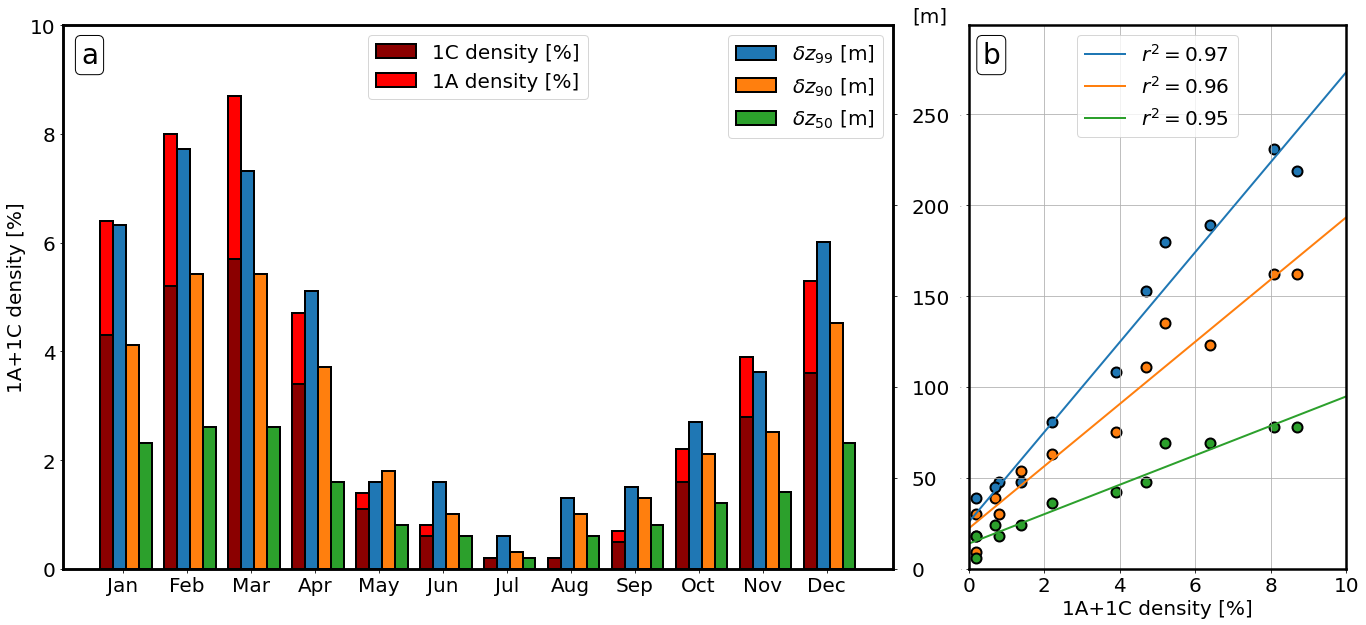

In [74]:
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

months = ('Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
data = {
    'density [%]': H_f_tot_list,
    '$\delta z_{99}$ [m]': tracer_deep_99,
    '$\delta z_{90}$ [m]': tracer_deep_90,
    '$\delta z_{50}$ [m]': tracer_deep_50
}
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig= plt.figure(figsize=(23,10))

gs = GridSpec(1, 3, figure=fig)

ax = fig.add_subplot(gs[0, :2])

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


ax2 = ax.twinx()

for attribute, measurement in data.items():
    offset = width * multiplier
    if attribute=="density [%]" or attribute=="tracer_subduction":
        #rects = ax.bar(x + offset, measurement, width, label=attribute,color='red')
        rects = ax.bar(x + offset, H_f_c_list, width, label="1C density [%]",color='darkred',edgecolor = "black",linewidth = 2)
        rects = ax.bar(x + offset, H_f_ac_list, width, bottom = H_f_c_list,label="1A density [%]",color='red',edgecolor = "black",linewidth = 2)
    else:
        rects = ax2.bar(x + offset, measurement, width, label=attribute,edgecolor = "black",linewidth = 2)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('1A+1C density [%]',size=20)

ax.legend(prop={'size': 20},loc='upper center')
ax2.legend(prop={'size': 20},loc='upper right')
#ax2.set_ylabel("depth [m]",size=20,rotation='horizontal',loc='top')
ax.set_ylim(0, 10)
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax2.set_ylim(0, 299)

#ax.set_xticks(x + width, months)
#ax.set_xticklabels(x + width, months,rot=45)
#plt.yticks(pad=10)

ax2.tick_params(axis='y', pad=15)

plt.xlabel("month",size=20)

plt.xticks(np.arange(0.25,12.25,1),months,size=20,rotation=45)

    
ax3 = fig.add_subplot(gs[0, 2])
label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


plt.scatter(H_f_tot_list,tracer_deep_99,color='C0',s=100,edgecolor = "black",linewidth = 2)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_99, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_99 - np.mean(tracer_deep_99))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel("1A+1C density [%]",size=20)
#plt.text(4,250,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='blue',size=20)
plt.plot(x, y_pred, color='C0', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)

plt.grid()
plt.xlim(0,10)

plt.scatter(H_f_tot_list,tracer_deep_90,color='C1',s=100,edgecolor = "black",linewidth = 2)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_90, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_90 - np.mean(tracer_deep_90))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
#plt.text(6,100,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.plot(x, y_pred, color='C1', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)
#plt.savefig(dir_save+'tracer_front_vs_deepening.png', dpi = nb_dpi)

plt.scatter(H_f_tot_list,tracer_deep_50,color='C2',s=100,edgecolor = "black",linewidth = 2)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_50, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_50 - np.mean(tracer_deep_50))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
#plt.text(6,0.2,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='green',size=20)
plt.plot(x, y_pred, color='C2', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)

ax3.set_ylim(0, 299)

ax3.set_ylabel("[m]",size=20,rotation='horizontal',loc='top',labelpad=12)
#plt.yticks(color="white")

plt.yticks(size=0)

plt.legend(prop={'size': 20},loc='upper center')

plt.savefig(dir_save+'tracer_front_vs_deepening.pdf', dpi = nb_dpi,bbox_inches='tight')

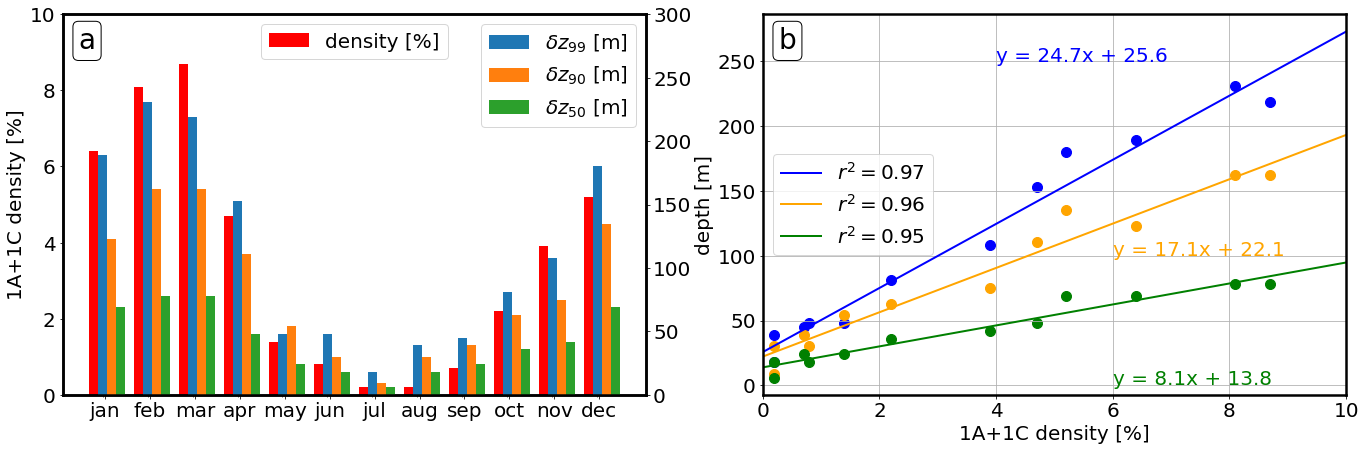

In [3]:
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import numpy as np

months = ('jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec')
data = {
    'density [%]': H_f_tot_list,
    '$\delta z_{99}$ [m]': tracer_deep_99,
    '$\delta z_{90}$ [m]': tracer_deep_90,
    '$\delta z_{50}$ [m]': tracer_deep_50
}
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig= plt.figure(figsize=(23,7))

    
ax = fig.add_subplot(1,2,1)

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


ax2 = ax.twinx()

for attribute, measurement in data.items():
    offset = width * multiplier
    if attribute=="density [%]" or attribute=="tracer_subduction":
        rects = ax.bar(x + offset, measurement, width, label=attribute,color='red')
    else:
        rects = ax2.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('1A+1C density [%]',size=20)

ax.legend(prop={'size': 20},loc='upper center')
ax2.legend(prop={'size': 20},loc='upper right')
ax2.set_ylabel("depth [m]",size=20)
ax.set_ylim(0, 10)
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax2.set_ylim(0, 300)

ax.set_xticks(x + width, months)
#ax.set_xticklabels(x + width, months,rot=45)

plt.xlabel("month",size=20)

plt.xticks(np.arange(0.25,12.25,1),list_month,size=20,rotation=45)

    
ax3 = fig.add_subplot(1,2,2)
label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


plt.scatter(H_f_tot_list,tracer_deep_99,color='blue',s=100)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_99, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_99 - np.mean(tracer_deep_99))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel("1A+1C density [%]",size=20)
plt.text(4,250,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='blue',size=20)
plt.plot(x, y_pred, color='blue', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)

plt.grid()
plt.xlim(0,10)

plt.scatter(H_f_tot_list,tracer_deep_90,color='orange',s=100)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_90, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_90 - np.mean(tracer_deep_90))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
plt.text(6,100,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)
#plt.savefig(dir_save+'tracer_front_vs_deepening.png', dpi = nb_dpi)

plt.scatter(H_f_tot_list,tracer_deep_50,color='green',s=100)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(H_f_tot_list,tracer_deep_50, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_50 - np.mean(tracer_deep_50))**2))
x = np.linspace(0,10,100)
y_pred = np.polyval(coefficients, x)
plt.text(6,0.2,'y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='green',size=20)
plt.plot(x, y_pred, color='green', label='$r^2=${0:.2f}'.format(regress_coef[0]),linewidth=2)


plt.legend(prop={'size': 20},loc='center left')

#plt.savefig(dir_save+'tracer_front_vs_deepening.pdf', dpi = nb_dpi,bbox_inches='tight')


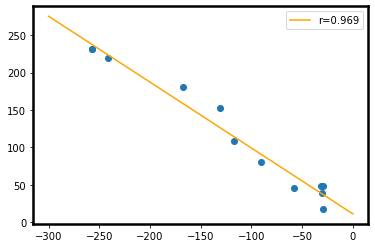

In [20]:
# with MLD 

plt.scatter(mld_mean,tracer_deep_99)
coefficients,residuals,rank,singular_values,rcond = np.polyfit(mld_mean,tracer_deep_99, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((tracer_deep_99 - np.mean(tracer_deep_99))**2))
x = np.linspace(-300,0,100)
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='r={0:.3f}'.format(regress_coef[0]))
plt.legend()